# 快速开始 ABACUS｜自洽 能带 态密度 结构优化

> 作者: 赵天琦 [zhaotq@bjaisi.com](mailto:zhaotq@bjaisi.com)
>
> 创建日期: 2023-03-30
>
> 最后一次修改: 赵天琦 [zhaotq@bjaisi.com](mailto:zhaotq@bjaisi.com)
>
> 最后一次修改时间: 2023-04-01
>
> 描述: 本教程可在 Bohrium Notebook 上直接运行。你可以点击界面上方蓝色按钮**开始连接**，选择 `abacus:3.2.0-toolkit-notebook` 镜像及任何一款节点配置，稍等片刻即可运行。
> 如您遇到任何问题，请联系 [bohrium@dp.tech](mailto:bohrium@dp.tech) 。
>
> 共享协议: 本作品采用[知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议](https://creativecommons.org/licenses/by-nc-sa/4.0/)进行许可。

## 目标

> **上手使用ABACUS做第一性原理材料模拟计算**

在学习本教程后，你将能够：

- 使用ABACUS做自洽计算
- 计算得到电子能带结构图
- 计算得到电子态密度图
- 使用ABACUS做结构优化计算

**阅读该教程【最多】约需 15 分钟，让我们开始吧！**

## 目录

* [背景](#background)
* [自洽计算](#1)
    * [准备输入文件](#1-1)
    * [运行自洽场计算](#1-2)
    * [得到总能量](#1-3)
* [电子能带结构](#2)
    * [自洽计算](#2-1)
    * [非自洽计算](#2-2)
    * [画能带图](#2-3)
* [态密度计算](#3)
    * [自洽计算](#3-1)
    * [非自洽计算](#3-2)
    * [画总态密度图](#3-3)
    * [画投影态密度图](#3-4)
* [结构优化](#4)
* [进一步阅读](#furtherreading)

## 背景 <a id ='background'></a>

密度泛函理论算法是用于第一性原理材料性质模拟的重要基础工具。目前，密度泛函理论算法已被实现在许多软件中，例如VASP，Quantum Espresso，ABIINT，CP2K等。

ABACUS是一款基于密度泛函理论发展起来的国内开源软件，支持平面波和数值原子轨道两种基矢量，主要采用模守恒赝势，功能较齐全，可适用于从小体系到上千原子大体系的电子结构优化、原子结构弛豫、分子动力学模拟等计算。

本教程将以面心立方氧化镁为例，介绍ABACUS的基本用法。这里我们采用ABACUS（原子算筹）软件的3.2.0版本。

## 1. 自洽场计算<a id ='1'></a>

自洽，是自洽场计算(SCF, self-consistent field calculation)的简称，它是密度泛函理论（DFT）算法的基础，也是DFT被称为第一性原理方法的原因。

从自洽场计算中我们可以得到一个体系的基态结构和基态能量。

基态结构使得我们可以得到体系的结构参数，例如晶胞参数，化学键键长键角等，而基态能量使得我们可以进一步得到原子受力和晶体材料的应力-应变性质等。

因此自洽场计算是开始做DFT计算的基础。

### 1.1 准备输入文件<a id ='1-1'></a>

这里我们在gitee上为大家准备好了快速上手的案例，大家可以直接使用git命令来下载。

In [1]:
! git clone https://gitee.com/deepmodeling/colombo-ABACUS.git

Cloning into 'colombo-ABACUS'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 300 (delta 29), reused 98 (delta 19), pack-reused 182
Receiving objects: 100% (300/300), 3.79 MiB | 821.00 KiB/s, done.
Resolving deltas: 100% (77/77), done.
Updating files: 100% (160/160), done.


注意：该临时文件将在本案例末执行删除操作。

### 1.2 运行自洽场计算<a id ='1-2'></a>

运行自洽场计算需在**INPUT**中将calculation设置为**scf**(详细的参数说明请参考[文档说明](http://abacus.deepmodeling.com/en/latest/advanced/input_files/input-main.html))。

这里的STRU结构为MgO的单胞(conventional cell)。

STRU文件的详细说明请参考[链接](http://abacus.deepmodeling.com/en/latest/advanced/input_files/stru.html)。

需注意：
- 在此镜像中，由于abacus是基于intel oneapi的环境安装的，我们运行abacus之前需要使用命令`. /opt/intel/oneapi/setvars.sh`装载相应的环境。
- 设置`OMP_NUM_THREADS=1`使用单线程进行计算。
- `abacus`为ABACUS可执行程序的命令。

In [2]:
cd colombo-ABACUS/ABACUS/MgO_LCAO/SCF

/data/bohrium-notebook/Proem/colombo-ABACUS/ABACUS/MgO_LCAO/SCF


In [3]:
cat INPUT

INPUT_PARAMETERS
suffix 			MgO
ntype 			2
pseudo_dir 		../../PP_ORB
orbital_dir 		../../PP_ORB
ecutwfc 		100 
scf_thr 		1e-6 
basis_type 		lcao
calculation 		scf 


In [4]:
cat KPT

K_POINTS
0
Gamma
4 4 4 0 0 0


In [5]:
cat STRU

ATOMIC_SPECIES
Mg 24.305 Mg_ONCV_PBE-1.0.upf
O  15.999 O_ONCV_PBE-1.0.upf

NUMERICAL_ORBITAL
Mg_gga_8au_100Ry_4s2p1d.orb
O_gga_8au_100Ry_2s2p1d.orb

LATTICE_CONSTANT
1.8897259886 	# 1.8897259886 Bohr = 1.0 Angstrom

LATTICE_VECTORS
4.27957 0.00000 0.00000
0.00000 4.27957 0.00000
0.00000 0.00000 4.27957

ATOMIC_POSITIONS
Direct 
Mg 
0.0 
4 
0.0 0.0 0.0 0 0 0 
0.0 0.5 0.5 0 0 0
0.5 0.0 0.5 0 0 0
0.5 0.5 0.0 0 0 0

O
0.0 
4 
0.5 0.0 0.0 0 0 0
0.5 0.5 0.5 0 0 0 
0.0 0.0 0.5 0 0 0 
0.0 0.5 0.0 0 0 0


In [6]:
!. /opt/intel/oneapi/setvars.sh && OMP_NUM_THREADS=1 abacus

 
:: initializing oneAPI environment ...
   dash: SH_VERSION = unknown
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: mkl -- latest
:: mpi -- latest
:: tbb -- latest
:: vtune -- latest
:: oneAPI environment initialized ::
 
Info: Local MPI proc number: 1,OpenMP thread number: 1,Total thread number: 1,Local thread limit: 52
                                                                                     
                              ABACUS v3.1                                            

               Atomic-orbital Based Ab-initio Computation at UStc                    

                     Website: http://abacus.ustc.edu.cn/                             
               Documentation: https://abacus.deepmodeling.com/                       
                  Repository: https://github.com/abacusmodeling/abacus-develop       
                              https://github.com/deepmodeling/abacus-develop       

### 1.3 得到总能量<a id ='1-3'></a>

In [7]:
! grep ETOT OUT.MgO/running_scf.log

 !FINAL_ETOT_IS -7663.909829526411 eV


## 2. 电子能带结构<a id ='2'></a>

电子的能带结构(Electronic band structure)是材料的一个重要性质，能带结构可以通过密度泛函理论算法来计算。

电子能带结构本质是电子的本征能量。得到电子的本征能量后，还可以计算得到电子有效质量，材料的光学，电学和磁性性质，因此电子能带结构也是分析材料性质的重要工具。

做电子能带结构计算首先需要通过**自洽计算**得到体系的电子密度，然后基于自洽计算的电子密度做一步**非自洽计算**，以得到布里渊区里高对称k点路径上电子的本征值，即能带结构。

### 2.1 自洽计算<a id ='2-1'></a>

这里的STRU结构为MgO的原胞(primitive cell)。

In [8]:
cd ../../MgO_LCAO/band_structure

/data/bohrium-notebook/Proem/colombo-ABACUS/ABACUS/MgO_LCAO/band_structure


In [9]:
cat STRU

ATOMIC_SPECIES
Mg 24.305 Mg_ONCV_PBE-1.0.upf upf201
O 15.999 O_ONCV_PBE-1.0.upf upf201

NUMERICAL_ORBITAL
Mg_gga_8au_100Ry_4s2p1d.orb
O_gga_8au_100Ry_2s2p1d.orb

LATTICE_CONSTANT
8.087214649032902

ATOMIC_POSITIONS
Direct

Mg #label
0 #magnetism
1 #number of atoms
0  0  0  m  0  0  0

O #label
0 #magnetism
1 #number of atoms
0.5  0.5  0.5  m  0  0  0


In [10]:
cp INPUT_scf INPUT && cp KPT_scf KPT

In [11]:
cat INPUT

INPUT_PARAMETERS
suffix 			MgO
ntype 			2
pseudo_dir 		../../PP_ORB
orbital_dir 		../../PP_ORB
ecutwfc 		100 
scf_thr 		1e-6 
basis_type 		lcao
calculation 		scf 
out_chg			1
symmetry		1
latname			fcc


In [12]:
!. /opt/intel/oneapi/setvars.sh && OMP_NUM_THREADS=1 abacus

 
:: initializing oneAPI environment ...
   dash: SH_VERSION = unknown
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: mkl -- latest
:: mpi -- latest
:: tbb -- latest
:: vtune -- latest
:: oneAPI environment initialized ::
 
Info: Local MPI proc number: 1,OpenMP thread number: 1,Total thread number: 1,Local thread limit: 52
                                                                                     
                              ABACUS v3.1                                            

               Atomic-orbital Based Ab-initio Computation at UStc                    

                     Website: http://abacus.ustc.edu.cn/                             
               Documentation: https://abacus.deepmodeling.com/                       
                  Repository: https://github.com/abacusmodeling/abacus-develop       
                              https://github.com/deepmodeling/abacus-develop       

### 2.2 非自洽计算<a id ='2-2'></a>

运行非自洽计算需在**INPUT**中将calculation设置为**nscf**，为了输出能带结构文件，还需设置**out_band**为**true**或者**1**。高对称k点路径在**KPT**文件中设置，选用**Line**模式。

In [13]:
cp INPUT_nscf INPUT && cp KPT_nscf KPT

In [14]:
cat INPUT

INPUT_PARAMETERS
suffix 			MgO
ntype 			2
pseudo_dir 		../../PP_ORB
orbital_dir 		../../PP_ORB
ecutwfc 		100 
scf_thr 		1e-6 
basis_type 		lcao
calculation 		nscf 
init_chg		file
out_band		1
out_dos			1
latname			fcc
symmetry		0


In [15]:
cat KPT

K_POINTS			
7
Line		
0.375  0.375  0.750  20		# K
0.000  0.000  0.000  20		# G
0.500  0.000  0.500  20		# X
0.625  0.250  0.625  20         # U
0.500  0.500  0.500  20		# L
0.000  0.000  0.000  20		# G
0.500  0.250  0.750  1		# W


In [16]:
!. /opt/intel/oneapi/setvars.sh && OMP_NUM_THREADS=1 abacus

 
:: initializing oneAPI environment ...
   dash: SH_VERSION = unknown
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: mkl -- latest
:: mpi -- latest
:: tbb -- latest
:: vtune -- latest
:: oneAPI environment initialized ::
 
Info: Local MPI proc number: 1,OpenMP thread number: 1,Total thread number: 1,Local thread limit: 52
                                                                                     
                              ABACUS v3.1                                            

               Atomic-orbital Based Ab-initio Computation at UStc                    

                     Website: http://abacus.ustc.edu.cn/                             
               Documentation: https://abacus.deepmodeling.com/                       
                  Repository: https://github.com/abacusmodeling/abacus-develop       
                              https://github.com/deepmodeling/abacus-develop       

### 2.3 画能带图<a id ='2-3'></a>

In [17]:
cd OUT.MgO

/data/bohrium-notebook/Proem/colombo-ABACUS/ABACUS/MgO_LCAO/band_structure/OUT.MgO


In [18]:
cp ../KPT ../config.json .

在running_scf.log里面搜索E_Fermi，找到费米能级的值

In [19]:
cat config.json

{
	"bandfile" : "BANDS_1.dat",
	"efermi" : 8.27,
	"energy_range"	: [-4, 9],
	"kptfile" : "KPT"
}





In [20]:
!/opt/miniconda3/bin/abacus-plot -b

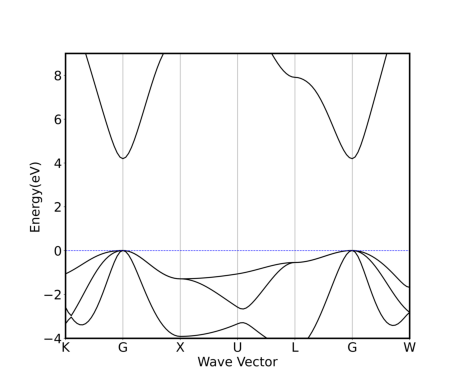

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
plt.axis('off')
plt.imshow(Image.open('band.png'))
plt.show()

## 3. 态密度计算<a id ='3'></a>

态密度(Density of states)是另外一个用于分析材料性质的重要性质。

它本质上描述的是在不同能量上电子态的密度，利用态密度可以得到材料的光学性质等。

通过将波函数投影到每个原子的不同轨道，我们还可以分析不同原子轨道对电子态密度的贡献，用于从原子和电子角度分析和设计材料性质。

### 3.1 自洽计算<a id ='3-1'></a>

与能带计算的自洽计算相同。

In [22]:
cd ../../../MgO_LCAO/dos

/data/bohrium-notebook/Proem/colombo-ABACUS/ABACUS/MgO_LCAO/dos


In [23]:
cp INPUT_scf INPUT && cp KPT_scf KPT

In [24]:
cat KPT

K_POINTS
0
Gamma
8 8 8 0 0 0


In [25]:
!. /opt/intel/oneapi/setvars.sh && OMP_NUM_THREADS=1 abacus

 
:: initializing oneAPI environment ...
   dash: SH_VERSION = unknown
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: mkl -- latest
:: mpi -- latest
:: tbb -- latest
:: vtune -- latest
:: oneAPI environment initialized ::
 
Info: Local MPI proc number: 1,OpenMP thread number: 1,Total thread number: 1,Local thread limit: 52
                                                                                     
                              ABACUS v3.1                                            

               Atomic-orbital Based Ab-initio Computation at UStc                    

                     Website: http://abacus.ustc.edu.cn/                             
               Documentation: https://abacus.deepmodeling.com/                       
                  Repository: https://github.com/abacusmodeling/abacus-develop       
                              https://github.com/deepmodeling/abacus-develop       

### 3.2 非自洽计算<a id ='3-2'></a>

做态密度计算中的非自洽计算需设置更加密的k点网格。为了输出能带结构文件，还需设置**out_dos**为**true**或者**1**。

In [26]:
cp INPUT_nscf INPUT && cp KPT_nscf KPT

In [27]:
cat KPT

K_POINTS
0
Gamma
10 10 10 0 0 0


In [28]:
!. /opt/intel/oneapi/setvars.sh && OMP_NUM_THREADS=1 abacus

 
:: initializing oneAPI environment ...
   dash: SH_VERSION = unknown
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: mkl -- latest
:: mpi -- latest
:: tbb -- latest
:: vtune -- latest
:: oneAPI environment initialized ::
 
Info: Local MPI proc number: 1,OpenMP thread number: 1,Total thread number: 1,Local thread limit: 52
                                                                                     
                              ABACUS v3.1                                            

               Atomic-orbital Based Ab-initio Computation at UStc                    

                     Website: http://abacus.ustc.edu.cn/                             
               Documentation: https://abacus.deepmodeling.com/                       
                  Repository: https://github.com/abacusmodeling/abacus-develop       
                              https://github.com/deepmodeling/abacus-develop       

### 3.3 画总态密度图<a id ='3-3'></a>

总态密度(Total density of states)是指在一个能量范围内电子在每个能量点上总的态密度值。

这里的“总”是相对下面的投影态密度(projected density of states)讲的，而投影态密度指的是在一个能量范围内将电子波函数投影到每个原子的每个轨道得到的态密度值。

In [29]:
cd OUT.MgO

/data/bohrium-notebook/Proem/colombo-ABACUS/ABACUS/MgO_LCAO/dos/OUT.MgO


In [30]:
cp ../config_tdos.json ./config.json

In [31]:
cat config.json

{
    "tdosfile": "TDOS",
    "efermi": 8.27771540465,
    "energy_range": [-5,7],
    "dos_range": [0,5],
    "figsize":[14,10],
    "tdosfig": "tdos.png"
}


In [32]:
!/opt/miniconda3/bin/abacus-plot -d

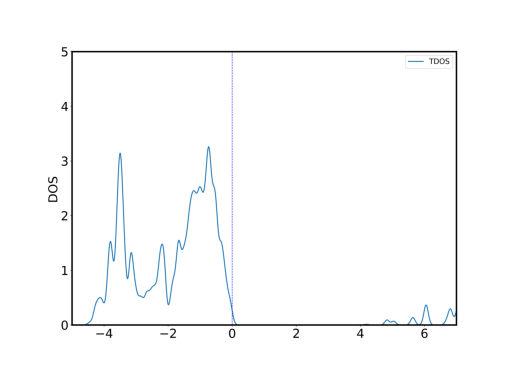

In [33]:
import matplotlib.pyplot as plt
from PIL import Image
plt.axis('off')
plt.imshow(Image.open('tdos.png'))
plt.show()

### 3.4 画投影态密度图<a id ='3-4'></a>

In [34]:
cp ../config_pdos.json ./config.json

In [35]:
cat config.json

{
    "pdosfile": "PDOS",
    "efermi": 8.27771540465,
    "energy_range": [-5,7],
    "dos_range": [0,5],
    "figsize":[14,10],
    "species":{"Mg":[0,1,2],"O":[0,1,2]},
    "pdosfig": "pdos.png"
}


In [36]:
!/opt/miniconda3/bin/abacus-plot -d -p -o

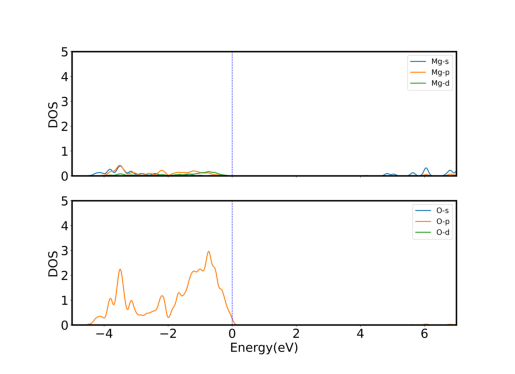

In [37]:
import matplotlib.pyplot as plt
from PIL import Image
plt.axis('off')
plt.imshow(Image.open('pdos.png'))
plt.show()

## 4. 结构优化<a id ='4'></a>

结构优化是从一个一般的结构出发，利用优化算法得到基态结构的过程。对于周期性体系，优化计算可以根据需要针对体系的不同自由度来进行优化。

在ABACUS中，如果只优化原子位置，而晶胞固定不变，则需在INPUT中将calculation设置为**relax**;

如果需要同时做原子位置优化和晶胞优化，则需要将calculation设置为**cell-relax**；

此外，需要注意的参数还有原子受力的收敛标准**force_thr_ev**和应力收敛标准**stress_thr**的设置；

更多的优化设置，请阅读[ABACUS Documentation](http://abacus.deepmodeling.com/en/latest/)。关于结构优化，可参考[文档](http://abacus.deepmodeling.com/en/latest/quick_start/hands_on.html#running-geometry-optimization)中对这部分的详细说明。

In [38]:
cd ../../../MgO_LCAO/optimization

/data/bohrium-notebook/Proem/colombo-ABACUS/ABACUS/MgO_LCAO/optimization


In [39]:
cat INPUT

INPUT_PARAMETERS
suffix 			MgO
ntype 			2
pseudo_dir 		../../PP_ORB
orbital_dir 		../../PP_ORB
ecutwfc 		100 
scf_thr 		1e-6 
basis_type 		lcao
calculation 		cell-relax
force_thr_ev		0.01
stress_thr		5
relax_nmax		100
out_stru		1





In [40]:
!. /opt/intel/oneapi/setvars.sh && OMP_NUM_THREADS=1 abacus

 
:: initializing oneAPI environment ...
   dash: SH_VERSION = unknown
   args: Using "$@" for setvars.sh arguments: 
:: compiler -- latest
:: debugger -- latest
:: dev-utilities -- latest
:: mkl -- latest
:: mpi -- latest
:: tbb -- latest
:: vtune -- latest
:: oneAPI environment initialized ::
 
Info: Local MPI proc number: 1,OpenMP thread number: 1,Total thread number: 1,Local thread limit: 52
                                                                                     
                              ABACUS v3.1                                            

               Atomic-orbital Based Ab-initio Computation at UStc                    

                     Website: http://abacus.ustc.edu.cn/                             
               Documentation: https://abacus.deepmodeling.com/                       
                  Repository: https://github.com/abacusmodeling/abacus-develop       
                              https://github.com/deepmodeling/abacus-develop       

In [41]:
# 在案例完成后，删除该案例中下载的 colombo-ABACUS 文件夹
import os

# 获取当前工作目录的绝对路径
current_dir = os.getcwd()

if current_dir.endswith("colombo-ABACUS/ABACUS/MgO_LCAO/optimization"):
    # 获取 colombo-ABACUS 上级目录的绝对路径
    parent_dir = os.path.abspath(os.path.join(current_dir, '../../../..'))
    os.chdir(parent_dir)

! if [ -d "colombo-ABACUS" ]; then rm -r colombo-ABACUS; echo "删除成功"; fi

删除成功


## 进一步阅读 <a id='furtherreading'></a>

如果您希望更深入学习ABACUS，本节提供有关该主题的更多资源。

**ABACUS项目**

- [ABACUS Homepage](http://abacus.ustc.edu.cn/main.htm)
- [ABACUS Documentation](http://abacus.deepmodeling.com/en/latest/)
- [ABACUS on Github](https://github.com/deepmodeling/abacus-develop)
- [ABACUS on Gitee](https://gitee.com/deepmodeling/abacus-develop)



<a href="https://bohrium.dp.tech/notebook/ba75fd68fef246db9895e317050f0db0" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>